In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import random
import numpy as np
import pandas as pd
import torch
import torchvision
from torch import nn
from IPython import display
from torch.utils import data
from torch.nn import functional as F
from d2l import torch as d2l
from matplotlib import pyplot as plt
from utils import d2lhelper

In [2]:
# Input: [1, 28, 28]
net = nn.Sequential(
    # [1, 28, 28] => [6, 28, 28]
    nn.Conv2d(1, 6, kernel_size=5, padding=2), 
    nn.BatchNorm2d(num_features=6), 
    nn.Sigmoid(),
    # [6, 28, 28] => [6, 14, 14]
    nn.AvgPool2d(kernel_size=2, stride=2),
    # [6, 14, 14] => [16, 10, 10]
    nn.Conv2d(6, 16, kernel_size=5), 
    nn.BatchNorm2d(num_features=16), 
    nn.Sigmoid(),
    # [16, 10, 10] => [16, 5, 5]
    nn.AvgPool2d(kernel_size=2, stride=2),
    # [16, 5, 5] => 16 * 5 * 5
    nn.Flatten(),
    # 16 * 5 * 5 => 120
    nn.Linear(16 * 5 * 5, 120), 
    nn.BatchNorm1d(num_features=120), 
    nn.Sigmoid(),
    # 120 => 84
    nn.Linear(120, 84), 
    nn.BatchNorm1d(num_features=84), 
    nn.Sigmoid(),
    # 84 => 10
    nn.Linear(84, 10)
)

In [3]:
X = torch.rand(size=(2, 1, 28, 28), dtype=torch.float32) # 这里测试的时候做的是两个样本的测试，因为 batch_size=1 是不行的
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([2, 6, 28, 28])
BatchNorm2d output shape: 	 torch.Size([2, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([2, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([2, 6, 14, 14])
Conv2d output shape: 	 torch.Size([2, 16, 10, 10])
BatchNorm2d output shape: 	 torch.Size([2, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([2, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([2, 16, 5, 5])
Flatten output shape: 	 torch.Size([2, 400])
Linear output shape: 	 torch.Size([2, 120])
BatchNorm1d output shape: 	 torch.Size([2, 120])
Sigmoid output shape: 	 torch.Size([2, 120])
Linear output shape: 	 torch.Size([2, 84])
BatchNorm1d output shape: 	 torch.Size([2, 84])
Sigmoid output shape: 	 torch.Size([2, 84])
Linear output shape: 	 torch.Size([2, 10])


In [4]:
batch_size = 256
num_workers = 4
train_iter, test_iter = d2lhelper.load_data_fashion_mnist(batch_size=batch_size, dataloader_worker_count=num_workers)

loss 0.244, train acc 0.944, test acc 0.872
15928.8 examples/sec on cuda


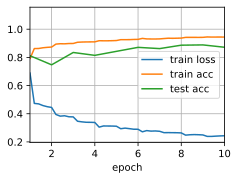

In [5]:
lr, num_epochs = 0.9, 10
d2lhelper.train_cnn_ch6(net, train_iter, test_iter, num_epochs, lr, torch.device('cuda'))